In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [93]:
main_df=pd.read_csv('train.csv')
main_df.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack


In [104]:
duplicate_check =  main_df.drop(['ID','POSTAL_CODE','CREDIT_SCORE','OUTCOME'],axis=1)
duplicate_check = duplicate_check[duplicate_check.duplicated()]
duplicate_check

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
1069,26-39,male,0-9y,none,working class,1.0,before 2015,1.0,0.0,14000.0,0,0,0,Sedan
1158,40-64,male,0-9y,none,upper class,1.0,after 2015,0.0,1.0,11000.0,0,0,0,HatchBack
1226,26-39,female,0-9y,none,working class,1.0,before 2015,0.0,0.0,12000.0,0,0,0,Sports Car
1776,65+,male,0-9y,none,upper class,1.0,before 2015,1.0,0.0,9000.0,0,0,0,HatchBack
2300,65+,female,10-19y,university,upper class,1.0,after 2015,0.0,1.0,10000.0,0,0,0,Sedan
2427,26-39,male,20-29y,none,upper class,1.0,before 2015,0.0,0.0,11000.0,0,0,0,HatchBack
2428,65+,female,20-29y,none,upper class,1.0,after 2015,1.0,0.0,9000.0,0,0,0,Sports Car
2435,40-64,female,20-29y,high school,upper class,1.0,before 2015,1.0,1.0,11000.0,0,0,0,HatchBack
2476,26-39,male,20-29y,none,upper class,1.0,before 2015,1.0,1.0,12000.0,0,0,0,SUV
2608,40-64,male,0-9y,none,upper class,1.0,after 2015,0.0,0.0,8000.0,0,0,0,Sports Car


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
ID                     105000 non-null int64
AGE                    105000 non-null object
GENDER                 105000 non-null object
DRIVING_EXPERIENCE     105000 non-null object
EDUCATION              105000 non-null object
INCOME                 105000 non-null object
CREDIT_SCORE           105000 non-null float64
VEHICLE_OWNERSHIP      105000 non-null float64
VEHICLE_YEAR           105000 non-null object
MARRIED                105000 non-null float64
CHILDREN               105000 non-null float64
POSTAL_CODE            105000 non-null int64
ANNUAL_MILEAGE         105000 non-null float64
SPEEDING_VIOLATIONS    105000 non-null int64
DUIS                   105000 non-null int64
PAST_ACCIDENTS         105000 non-null int64
OUTCOME                105000 non-null float64
TYPE_OF_VEHICLE        105000 non-null object
dtypes: float64(6), int64(5), object(7)
memory usage: 14.4+ 

In [4]:
main_df.shape

(105000, 18)

In [5]:
main_df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

######################################################################
######################################################################
# 1. univariate analysis - categorical value #
######################################################################
######################################################################

df=main_df.loc[main_df['POSTAL_CODE'] == 10238,]
df.shape

In [6]:
df = main_df.copy()

In [7]:
df['ID'].nunique() # what does this mean?

98485

In [8]:
df['AGE'].nunique()

4

In [9]:
df['GENDER'].nunique()

2

In [10]:
df['DRIVING_EXPERIENCE'].nunique()

4

In [11]:
df['EDUCATION'].nunique()

3

In [12]:
df['INCOME'].nunique()

4

In [13]:
df['VEHICLE_OWNERSHIP'].nunique()

2

In [14]:
df['VEHICLE_YEAR'].nunique()

2

In [15]:
df['MARRIED'].nunique()

2

In [16]:
df['CHILDREN'].nunique()

2

In [17]:
df['POSTAL_CODE'].nunique()

10937

In [18]:
df['ANNUAL_MILEAGE'].nunique()

20

In [19]:
df['SPEEDING_VIOLATIONS'].nunique()

21

In [20]:
df['DUIS'].nunique()

7

In [21]:
df['PAST_ACCIDENTS'].nunique()

16

In [22]:
df['OUTCOME'].nunique()

2

In [23]:
df['TYPE_OF_VEHICLE'].nunique()

4

In [24]:
df['AGE'].value_counts()

40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: AGE, dtype: int64

In [25]:
df['GENDER'].value_counts()/ len(df.GENDER)

male      0.622067
female    0.377933
Name: GENDER, dtype: float64

In [26]:
df['DRIVING_EXPERIENCE'].value_counts()/len(df.DRIVING_EXPERIENCE)

20-29y    0.357076
0-9y      0.315343
10-19y    0.239057
30y+      0.088524
Name: DRIVING_EXPERIENCE, dtype: float64

In [27]:
df['EDUCATION'].value_counts()/len(df.EDUCATION)

high school    0.443714
university     0.297333
none           0.258952
Name: EDUCATION, dtype: float64

In [28]:
df['INCOME'].value_counts()/len(df.INCOME)

upper class      0.488295
working class    0.232895
middle class     0.140362
poverty          0.138448
Name: INCOME, dtype: float64

In [29]:
df['VEHICLE_OWNERSHIP'].value_counts()/len(df.VEHICLE_OWNERSHIP)

1.0    0.827038
0.0    0.172962
Name: VEHICLE_OWNERSHIP, dtype: float64

In [30]:
df['VEHICLE_YEAR'].value_counts()/len(df.VEHICLE_OWNERSHIP)

before 2015    0.547724
after 2015     0.452276
Name: VEHICLE_YEAR, dtype: float64

In [31]:
df['MARRIED'].value_counts()/len(df.MARRIED)

1.0    0.584143
0.0    0.415857
Name: MARRIED, dtype: float64

In [32]:
df['CHILDREN'].value_counts()/len(df.CHILDREN)

1.0    0.52
0.0    0.48
Name: CHILDREN, dtype: float64

In [33]:
df['ANNUAL_MILEAGE'].value_counts() / len(df.ANNUAL_MILEAGE)

14000.0    0.154914
10000.0    0.154333
13000.0    0.150000
9000.0     0.114152
11000.0    0.099752
12000.0    0.081562
7000.0     0.057552
15000.0    0.049438
6000.0     0.034781
8000.0     0.030095
16000.0    0.022524
3000.0     0.014429
4000.0     0.011238
5000.0     0.008771
17000.0    0.005905
2000.0     0.005257
18000.0    0.003000
19000.0    0.001505
20000.0    0.000743
21000.0    0.000048
Name: ANNUAL_MILEAGE, dtype: float64

In [34]:
df['SPEEDING_VIOLATIONS'].value_counts() / len(df.SPEEDING_VIOLATIONS)

0     0.658695
1     0.189210
2     0.083324
3     0.028476
4     0.016076
5     0.008676
6     0.004600
7     0.003343
8     0.002476
9     0.001638
10    0.001038
11    0.000829
13    0.000552
12    0.000533
14    0.000238
15    0.000143
16    0.000067
17    0.000038
18    0.000029
19    0.000010
20    0.000010
Name: SPEEDING_VIOLATIONS, dtype: float64

In [35]:
df['DUIS'].value_counts() / len(df.DUIS)

0    0.935676
1    0.032667
2    0.011610
3    0.010181
4    0.006752
5    0.002390
6    0.000724
Name: DUIS, dtype: float64

In [36]:
df['PAST_ACCIDENTS'].value_counts() / len(df.PAST_ACCIDENTS)

0     0.750981
1     0.131067
2     0.061467
3     0.016657
4     0.012543
5     0.008629
6     0.005086
7     0.003933
8     0.003238
9     0.002248
10    0.001495
11    0.000876
12    0.000714
13    0.000476
14    0.000362
15    0.000229
Name: PAST_ACCIDENTS, dtype: float64

In [37]:
df['TYPE_OF_VEHICLE'].value_counts() / len(df.TYPE_OF_VEHICLE)

Sports Car    0.329448
Sedan         0.267810
HatchBack     0.237143
SUV           0.165600
Name: TYPE_OF_VEHICLE, dtype: float64

In [38]:
df['CREDIT_SCORE'].describe()

count    105000.000000
mean          0.602173
std           0.138045
min           0.066880
25%           0.514876
50%           0.601112
75%           0.703216
max           0.954075
Name: CREDIT_SCORE, dtype: float64

###################################################
## 1. Univariate analysis summary ##
###################################################

AGE:
 
•	40 to 64 age range customers are more
•	Followed by 65+
•	16 to 25 age range customers are less
•	Insurance cost is more when we gets old
•	Young people are prone to accidents and violations
GENDER:
•	Male customers are more (62%)
•	Insurance for female is less compared with male
DRIVING EXPERIENCE:
 
•	Only 8% of the customers have 30+ year of experience
EDUCATION
 
•	44% of the customers have completed high school education
INCOME
 
•	Close to 50% of the customers belongs to upper class income
•	If our income is more, we pay the premium on time and renew
VEHICLE OWNERSHIP
 
•	17% of the customers are not owners of the vehicle
•	They have less experience
VEHICLE YEAR | MARRIED | CHILDREN
 
•	Almost equal distribution
MILEAGE
 
•	The more you drive, the more you are likely to get accident. Insurance premium cost would be more.
•	Re-create variable with certain buckets / bin
SPEEDING VIOLATIONS
 
•	65% of the customers don’t have any violations
•	30% of the customers fall in the range of 1 to 5 violation scale
•	Violations would increase insurance premium cost
•	Re-create variable with certain buckets / bin
DUIS
 
•	7% of the customers have DUI violation
•	Driving while intoxicated / operating a motor vehicle impaired (DUI)
•	Re-create variable with certain buckets / bin
PAST ACCIDENTS
 
•	75% of the customers don’t have any past accidents
•	13% of the customers have one accident record
•	Re-create variable with certain buckets / bin
•	Frequent accident will increase the premium amount , flag as risky profile

VEHICLE TYPE
•	32 % of the customers have sports car insurance (premium is high than others)

Feature Engineering
•	MILEAGE (cut)
•	SPEEDING VIOLATIONS (cut)
•	DUIS (cut)
•	PAST ACCIDENTS (cut)

Change data type
•	VEHICLE OWNERSHIP
•	MARRIED
•	CHILDREN
•	ANNUAL_MILEAGE
•	SPEEDING_VIOLATIONS
•	DUIS
•	PAST_ACCIDENTS


Interaction Variable
•	Credit score * SPEEDING VIOLATIONS
•	Credit score * DUIS (cut)
•	Credit score * PAST ACCIDENTS (cut)
•	Credit score * MILEAGE (cut)



In [39]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

# Univariate for continuous variable #

C:\Users\Abin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


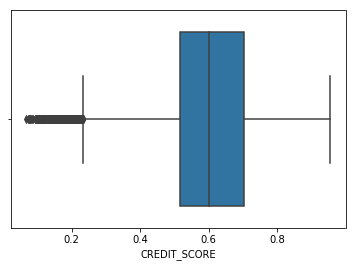

In [40]:
sns.boxplot(df["CREDIT_SCORE"])

C:\Users\Abin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


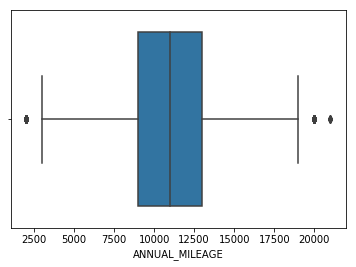

In [41]:
sns.boxplot(df["ANNUAL_MILEAGE"])

C:\Users\Abin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


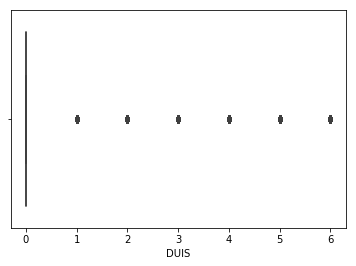

In [42]:
sns.boxplot(df["DUIS"])

C:\Users\Abin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


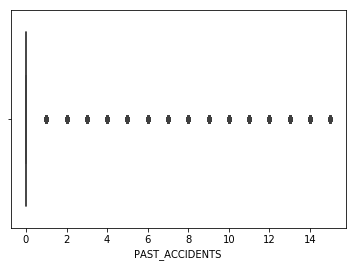

In [43]:
sns.boxplot(df["PAST_ACCIDENTS"])

C:\Users\Abin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


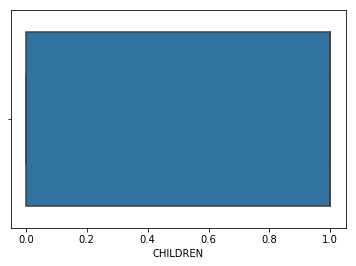

In [44]:
sns.boxplot(df["CHILDREN"])

In [45]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

## Bivariate Analysis ##

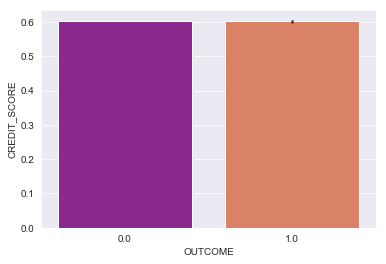

In [46]:
# set the backgroud style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, palette ='plasma')

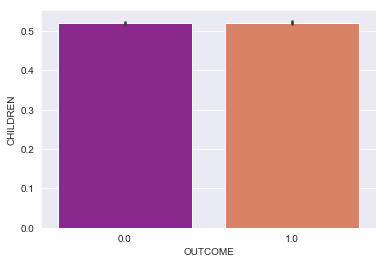

In [47]:
# set the backgroud style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='OUTCOME', y ='CHILDREN', data = df, palette ='plasma')

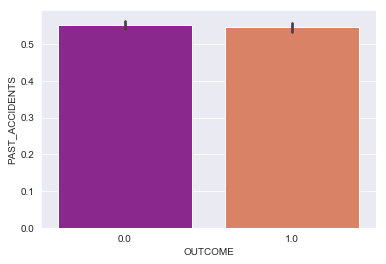

In [48]:
# set the backgroud style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='OUTCOME', y ='PAST_ACCIDENTS', data = df, palette ='plasma')

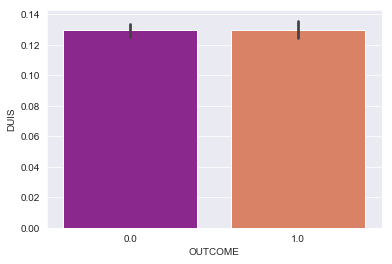

In [49]:
# set the backgroud style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='OUTCOME', y ='DUIS', data = df, palette ='plasma')

## Multivariate ##

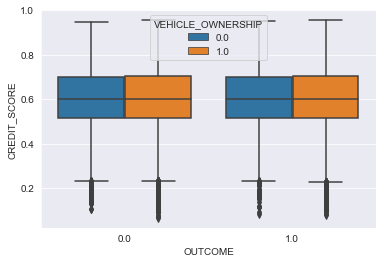

In [50]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='VEHICLE_OWNERSHIP')

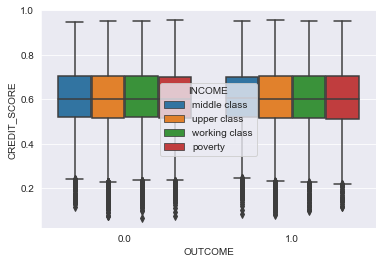

In [51]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='INCOME')

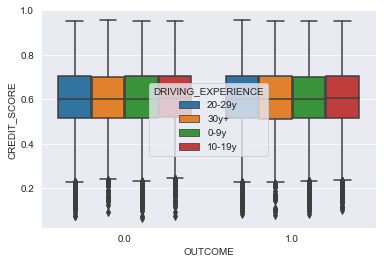

In [52]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='DRIVING_EXPERIENCE')

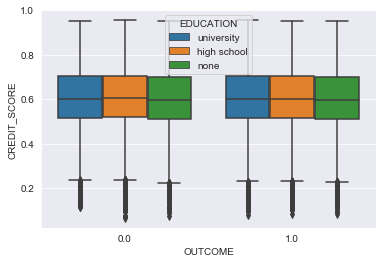

In [53]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='EDUCATION')

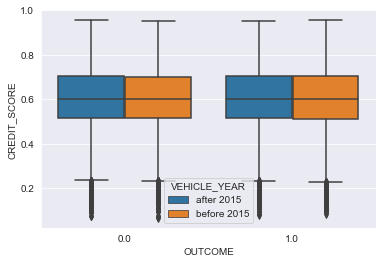

In [54]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='VEHICLE_YEAR')

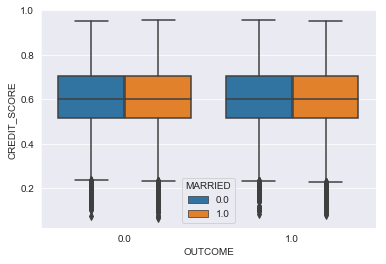

In [55]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='MARRIED')

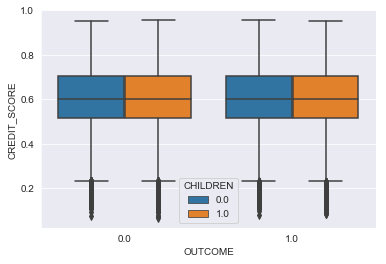

In [56]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='CHILDREN')

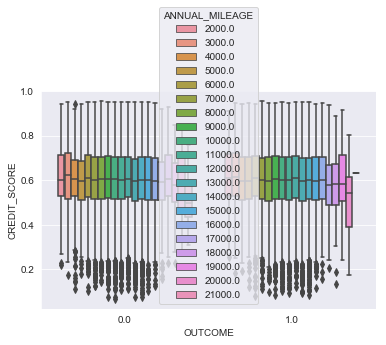

In [57]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='ANNUAL_MILEAGE')

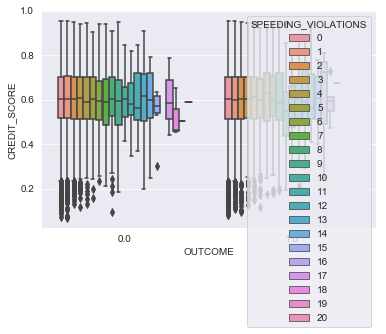

In [58]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='SPEEDING_VIOLATIONS')

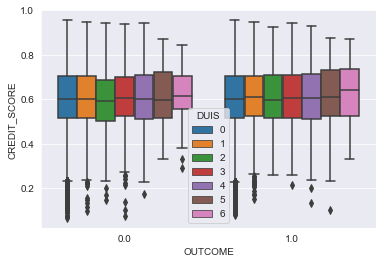

In [59]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='DUIS')

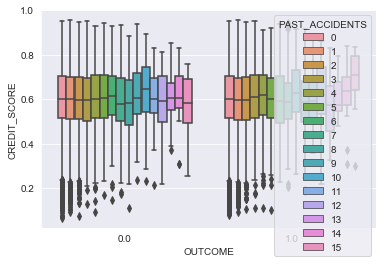

In [60]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='PAST_ACCIDENTS')

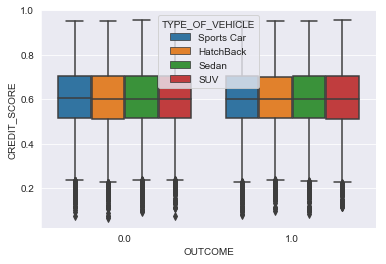

In [61]:
sns.boxplot(x ='OUTCOME', y ='CREDIT_SCORE', data = df, hue ='TYPE_OF_VEHICLE')

## Correlation Matrix ##

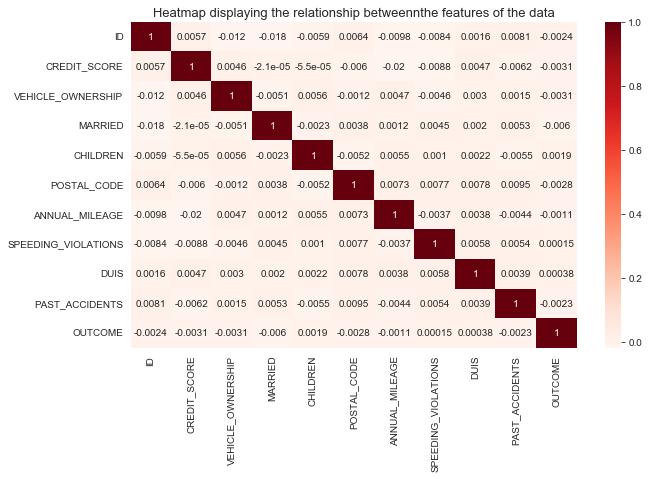

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

## duplicate ID analysis ##

duplicate = df[df.duplicated()]
duplicate.shape

duplicated_df = df.duplicated(subset ='ID', keep='first')
duplicated_df.shape

ID_list = []
for val in df['ID']:
    if val not in ID_list:
        ID_list.append(val)
    else:
        print(val)
        break

sub_df_101 = df.loc[df['ID']== 101,]
sub_df_101.to_excel('101.xlsx',index=False)

df['POSTAL_CODE'].value_counts()

## dont use from duplicate id analysis

In [63]:
df['OUTCOME'].value_counts()/len(df['OUTCOME'])

0.0    0.577352
1.0    0.422648
Name: OUTCOME, dtype: float64

In [64]:
df.shape

(105000, 18)

In [65]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [66]:
df.shape

(105000, 18)

## 1. postal code by id by outcome ##

## group by postal code and outcome ##

def return_code_two(postal_code_sum,var):
    postal_code = []
    id_code = []
    i = 0
    while i < postal_code_sum.shape[0]:
        tuple_val = postal_code_sum.index[i]
        postal_code.append(tuple_val[0])
        id_code.append(tuple_val[1])
        i+=1
    if var == 'POSTAL_CODE':
        return postal_code
    elif var == 'ID':
        return id_code

In [67]:
postal_code_sum=pd.DataFrame(df.groupby('POSTAL_CODE',as_index = True)['OUTCOME'].sum())
postal_code_sum['POSTAL_CODE'] = postal_code_sum.index
postal_code_count=pd.DataFrame(df.groupby(['POSTAL_CODE'],as_index = True)['OUTCOME'].count())
postal_code_count['POSTAL_CODE'] = postal_code_count.index
combinded_postal_code = pd.merge(postal_code_sum,postal_code_count,how='inner',on=['POSTAL_CODE'])
combinded_postal_code['POSTAL_CODE_PROPORTION'] = combinded_postal_code['OUTCOME_x']/combinded_postal_code['OUTCOME_y']
combinded_postal_code.head()

C:\Users\Abin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'POSTAL_CODE' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,OUTCOME_x,POSTAL_CODE,OUTCOME_y,POSTAL_CODE_PROPORTION
0,32896.0,10238,77608,0.423874
1,0.0,11343,1,0.000000
2,1.0,11514,1,1.000000
3,1.0,11545,1,1.000000
4,0.0,11626,1,0.000000


In [68]:
train_merged = pd.merge(combinded_postal_code,df,how='right',on=['POSTAL_CODE'])
train_merged.shape

(105000, 21)

id_code_sum=pd.DataFrame(df.groupby('ID',as_index = True)['OUTCOME'].sum())
id_code_sum['ID'] = id_code_sum.index
id_code_count=pd.DataFrame(df.groupby(['ID'],as_index = True)['OUTCOME'].count())
id_code_count['ID'] = id_code_count.index
combinded_id_code = pd.merge(id_code_sum,id_code_count,how='inner',on=['ID'])
combinded_id_code['ID_CODE_PROPORTION'] = combinded_id_code['OUTCOME_x']/combinded_id_code['OUTCOME_y']
combinded_id_code.head()

train_merged = pd.merge(combinded_id_code,train_merged,how='right',on=['ID'])
train_merged.shape

In [69]:
train_merged.head()

,OUTCOME_x,POSTAL_CODE,OUTCOME_y,POSTAL_CODE_PROPORTION,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,...,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,32896.0,10238,77608,0.423874,251762,26-39,male,20-29y,high school,middle class,...,1.0,before 2015,1.0,0.0,9000.0,0,0,0,1.0,HatchBack
1,32896.0,10238,77608,0.423874,481952,40-64,male,20-29y,none,middle class,...,1.0,before 2015,1.0,1.0,12000.0,0,0,0,1.0,Sedan
2,32896.0,10238,77608,0.423874,695325,40-64,female,20-29y,high school,upper class,...,1.0,after 2015,1.0,0.0,17000.0,0,0,0,1.0,SUV
3,32896.0,10238,77608,0.423874,702922,40-64,female,30y+,university,upper class,...,1.0,before 2015,1.0,0.0,12000.0,1,1,0,1.0,Sports Car
4,32896.0,10238,77608,0.423874,481986,26-39,male,20-29y,university,upper class,...,1.0,before 2015,0.0,0.0,11000.0,0,0,0,0.0,Sports Car


## combine test data ##

In [70]:
test=pd.read_csv('test.csv')
print(test.shape)
test['OUTCOME'] = 100
test.head(2)

(45000, 17)


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,OUTCOME
0,352928,40-64,male,10-19y,none,working class,0.814707,1,after 2015,0,1,10238,10000,0,0,0,HatchBack,100
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1,before 2015,0,0,34073,13000,0,0,0,Sedan,100


In [71]:
test.shape

(45000, 18)

In [72]:
test_merged = pd.merge(combinded_postal_code,test,how='right',on=['POSTAL_CODE'])
test_merged.shape

(45000, 21)

test_merged = pd.merge(combinded_id_code,test_merged,how='right',on=['ID'])
test_merged.shape

In [73]:
test_merged.head(5)

,OUTCOME_x,POSTAL_CODE,OUTCOME_y,POSTAL_CODE_PROPORTION,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,...,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,OUTCOME
0,32896.0,10238,77608.0,0.423874,352928,40-64,male,10-19y,none,working class,...,1,after 2015,0,1,10000,0,0,0,HatchBack,100
1,32896.0,10238,77608.0,0.423874,504022,40-64,male,10-19y,none,upper class,...,0,after 2015,1,0,12000,0,0,0,SUV,100
2,32896.0,10238,77608.0,0.423874,202404,26-39,male,20-29y,high school,upper class,...,1,after 2015,1,1,16000,1,0,0,SUV,100
3,32896.0,10238,77608.0,0.423874,164073,40-64,male,10-19y,high school,poverty,...,1,before 2015,0,1,14000,0,0,0,SUV,100
4,32896.0,10238,77608.0,0.423874,231458,40-64,male,0-9y,high school,upper class,...,0,after 2015,1,0,9000,2,0,0,SUV,100


In [74]:
test_merged.isnull().sum()

OUTCOME_x                 1984
POSTAL_CODE                  0
OUTCOME_y                 1984
POSTAL_CODE_PROPORTION    1984
ID                           0
AGE                          0
GENDER                       0
DRIVING_EXPERIENCE           0
EDUCATION                    0
INCOME                       0
CREDIT_SCORE                 0
VEHICLE_OWNERSHIP            0
VEHICLE_YEAR                 0
MARRIED                      0
CHILDREN                     0
ANNUAL_MILEAGE               0
SPEEDING_VIOLATIONS          0
DUIS                         0
PAST_ACCIDENTS               0
TYPE_OF_VEHICLE              0
OUTCOME                      0
dtype: int64

In [75]:
test_merged['POSTAL_CODE_PROPORTION'].fillna(0.5,inplace = True)

In [76]:
train_test_merged = pd.concat([train_merged,test_merged],axis=0)
print(train_test_merged.shape)
train_test_merged.head(2)

(150000, 21)


C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,AGE,ANNUAL_MILEAGE,CHILDREN,CREDIT_SCORE,DRIVING_EXPERIENCE,DUIS,EDUCATION,GENDER,ID,INCOME,...,OUTCOME,OUTCOME_x,OUTCOME_y,PAST_ACCIDENTS,POSTAL_CODE,POSTAL_CODE_PROPORTION,SPEEDING_VIOLATIONS,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR
0,26-39,9000.0,0.0,0.475741,20-29y,0,high school,male,251762,middle class,...,1.0,32896.0,77608.0,0,10238,0.423874,0,HatchBack,1.0,before 2015
1,40-64,12000.0,1.0,0.839817,20-29y,0,none,male,481952,middle class,...,1.0,32896.0,77608.0,0,10238,0.423874,0,Sedan,1.0,before 2015


## 2. Feature engineering ##
•	MILEAGE (cut)
•	SPEEDING VIOLATIONS (cut)
•	DUIS (cut)
•	PAST ACCIDENTS (cut)
•	CREDIT_SCORE (cut)

In [77]:
train_test_merged['ANNUAL_MILEAGE_BIN'] = pd.cut(train_test_merged['ANNUAL_MILEAGE'],[1000,9000,11000,13000,22000])
train_test_merged['ANNUAL_MILEAGE_BIN'].value_counts()

(1000, 9000]      41359
(9000, 11000]     37998
(13000, 22000]    35743
(11000, 13000]    34900
Name: ANNUAL_MILEAGE_BIN, dtype: int64

In [78]:
train_test_merged['SPEEDING_VIOLATIONS_BIN'] = pd.cut(train_test_merged['SPEEDING_VIOLATIONS'],[-1,1,4,21])
train_test_merged['SPEEDING_VIOLATIONS_BIN'].value_counts()

(-1, 1]    127150
(1, 4]      19139
(4, 21]      3711
Name: SPEEDING_VIOLATIONS_BIN, dtype: int64

In [79]:
train_test_merged['DUIS_BIN'] = pd.cut(train_test_merged['DUIS'],[-1,1,3,7])
train_test_merged['DUIS_BIN'].value_counts()

(-1, 1]    145222
(1, 3]       3316
(3, 7]       1462
Name: DUIS_BIN, dtype: int64

In [80]:
train_test_merged['PAST_ACCIDENTS_BIN'] = pd.cut(train_test_merged['PAST_ACCIDENTS'],[-1,1,4,16])
train_test_merged['PAST_ACCIDENTS_BIN'].value_counts()

(-1, 1]    132274
(1, 4]      13666
(4, 16]      4060
Name: PAST_ACCIDENTS_BIN, dtype: int64

In [81]:
train_test_merged['CREDIT_SCORE_BIN'] = pd.cut(train_test_merged['CREDIT_SCORE'],[-1,0.25,0.5,0.75,1.1])
train_test_merged['CREDIT_SCORE_BIN'].value_counts()

(0.5, 0.75]     93937
(0.25, 0.5]     31215
(0.75, 1.1]     23486
(-1.0, 0.25]     1362
Name: CREDIT_SCORE_BIN, dtype: int64

In [82]:
train_test_merged.columns

Index(['AGE', 'ANNUAL_MILEAGE', 'CHILDREN', 'CREDIT_SCORE',
       'DRIVING_EXPERIENCE', 'DUIS', 'EDUCATION', 'GENDER', 'ID', 'INCOME',
       'MARRIED', 'OUTCOME', 'OUTCOME_x', 'OUTCOME_y', 'PAST_ACCIDENTS',
       'POSTAL_CODE', 'POSTAL_CODE_PROPORTION', 'SPEEDING_VIOLATIONS',
       'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'ANNUAL_MILEAGE_BIN', 'SPEEDING_VIOLATIONS_BIN', 'DUIS_BIN',
       'PAST_ACCIDENTS_BIN', 'CREDIT_SCORE_BIN'],
      dtype='object')

3. Create continuous variable
•	ANNUAL_MILEAGE
•	SPEEDING_VIOLATIONS
•	DUIS
•	PAST_ACCIDENTS

for var in ['ANNUAL_MILEAGE','PAST_ACCIDENTS','SPEEDING_VIOLATIONS','DUIS']:
    new_var = '{}_CONT'.format(var)
    train_test_merged[new_var] = train_test_merged[var].copy()
train_test_merged.info()

In [83]:
train_test_merged.drop(['ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS'],axis=1, inplace = True)

## 3.Change data type
•	VEHICLE OWNERSHIP
•	MARRIED
•	CHILDREN
•	ANNUAL_MILEAGE
•	SPEEDING_VIOLATIONS
•	DUIS
•	PAST_ACCIDENTS

In [84]:
data_obj = ['VEHICLE_OWNERSHIP','MARRIED', 'CHILDREN']
data_obj

['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']

In [85]:
for var in data_obj:
    train_test_merged[var] = train_test_merged[var].astype('object')
train_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 44999
Data columns (total 22 columns):
AGE                        150000 non-null object
CHILDREN                   150000 non-null object
CREDIT_SCORE               150000 non-null float64
DRIVING_EXPERIENCE         150000 non-null object
EDUCATION                  150000 non-null object
GENDER                     150000 non-null object
ID                         150000 non-null int64
INCOME                     150000 non-null object
MARRIED                    150000 non-null object
OUTCOME                    150000 non-null float64
OUTCOME_x                  148016 non-null float64
OUTCOME_y                  148016 non-null float64
POSTAL_CODE                150000 non-null int64
POSTAL_CODE_PROPORTION     150000 non-null float64
TYPE_OF_VEHICLE            150000 non-null object
VEHICLE_OWNERSHIP          150000 non-null object
VEHICLE_YEAR               150000 non-null object
ANNUAL_MILEAGE_BIN         150000 non

In [86]:
train_test_merged.columns

Index(['AGE', 'CHILDREN', 'CREDIT_SCORE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'GENDER', 'ID', 'INCOME', 'MARRIED', 'OUTCOME', 'OUTCOME_x',
       'OUTCOME_y', 'POSTAL_CODE', 'POSTAL_CODE_PROPORTION', 'TYPE_OF_VEHICLE',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'ANNUAL_MILEAGE_BIN',
       'SPEEDING_VIOLATIONS_BIN', 'DUIS_BIN', 'PAST_ACCIDENTS_BIN',
       'CREDIT_SCORE_BIN'],
      dtype='object')

## 4. Dummy Variable ##

In [87]:
train_test_merged = train_test_merged.drop(['POSTAL_CODE_PROPORTION','CREDIT_SCORE','OUTCOME_x','OUTCOME_y','POSTAL_CODE','ID'],axis=1)
train_test_merged.head()

,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN
0,26-39,0,20-29y,high school,male,middle class,1,1.0,HatchBack,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.25, 0.5]"
1,40-64,1,20-29y,none,male,middle class,1,1.0,Sedan,1,before 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]"
2,40-64,0,20-29y,high school,female,upper class,1,1.0,SUV,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
3,40-64,0,30y+,university,female,upper class,1,1.0,Sports Car,1,before 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]"
4,26-39,0,20-29y,university,male,upper class,0,0.0,Sports Car,1,before 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]"


In [89]:
train_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 44999
Data columns (total 16 columns):
AGE                        150000 non-null object
CHILDREN                   150000 non-null object
DRIVING_EXPERIENCE         150000 non-null object
EDUCATION                  150000 non-null object
GENDER                     150000 non-null object
INCOME                     150000 non-null object
MARRIED                    150000 non-null object
OUTCOME                    150000 non-null float64
TYPE_OF_VEHICLE            150000 non-null object
VEHICLE_OWNERSHIP          150000 non-null object
VEHICLE_YEAR               150000 non-null object
ANNUAL_MILEAGE_BIN         150000 non-null category
SPEEDING_VIOLATIONS_BIN    150000 non-null category
DUIS_BIN                   150000 non-null category
PAST_ACCIDENTS_BIN         150000 non-null category
CREDIT_SCORE_BIN           150000 non-null category
dtypes: category(5), float64(1), object(10)
memory usage: 14.4+ MB


In [99]:
train_test_merged.columns

Index(['AGE', 'CHILDREN', 'DRIVING_EXPERIENCE', 'EDUCATION', 'GENDER',
       'INCOME', 'MARRIED', 'OUTCOME', 'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'ANNUAL_MILEAGE_BIN', 'SPEEDING_VIOLATIONS_BIN',
       'DUIS_BIN', 'PAST_ACCIDENTS_BIN', 'CREDIT_SCORE_BIN'],
      dtype='object')

In [92]:
#duplicate_check = train_test_merged.drop(['OUTCOME'],axis=1)
duplicate_check = train_test_merged.copy()
duplicate_check = duplicate_check[duplicate_check.duplicated()]
duplicate_check

,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN
155,65+,1,20-29y,none,male,upper class,1,0.0,Sedan,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
700,40-64,1,20-29y,high school,female,upper class,1,0.0,Sedan,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
784,26-39,0,0-9y,none,male,working class,1,1.0,Sedan,1,before 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
869,16-25,1,20-29y,high school,female,upper class,1,0.0,Sports Car,1,before 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
1323,65+,1,10-19y,high school,male,upper class,1,0.0,Sedan,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
1374,40-64,1,0-9y,university,male,upper class,1,1.0,Sedan,1,before 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
1475,65+,0,20-29y,high school,male,upper class,0,0.0,SUV,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
1597,40-64,0,20-29y,none,female,upper class,0,1.0,Sports Car,1,after 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
1751,26-39,0,0-9y,high school,male,upper class,0,0.0,HatchBack,1,after 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"
1784,65+,0,20-29y,none,female,upper class,1,1.0,Sports Car,1,after 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"


In [91]:
duplicate_check.shape

(42929, 15)

dummy_var = [x for x in train_test_merged.columns if x not in ['POSTAL_CODE_PROPORTION','CREDIT_SCORE','OUTCOME',
                                                               'ANNUAL_MILEAGE_CONT', 'PAST_ACCIDENTS_CONT','SPEEDING_VIOLATIONS_CONT', 'DUIS_CONT']]
dummy_var

dummy_data = train_test_merged[dummy_var]
dummy_data.head()

dummy_coded=pd.get_dummies(dummy_data,drop_first=True,dtype=float)
dummy_coded.head()

totat_train_data = pd.concat([dummy_coded,train_test_merged[['OUTCOME']]],axis=1)
totat_train_data.head()

totat_train_data.columns

## 5. Interaction Variable ##
•	Credit score * SPEEDING VIOLATIONS (cut)
•	Credit score * DUIS (cut)
•	Credit score * PAST ACCIDENTS (cut)
•	Credit score * MILEAGE (cut)

for x in totat_train_data.columns:
    if x not in ['POSTAL_CODE_PROPORTION',
       'CREDIT_SCORE', 'OUTCOME','ANNUAL_MILEAGE_CONT', 'PAST_ACCIDENTS_CONT',
       'SPEEDING_VIOLATIONS_CONT', 'DUIS_CONT','CREDIT_SCORE_BIN_(0.25, 0.5]', 'CREDIT_SCORE_BIN_(0.5, 0.75]',
       'CREDIT_SCORE_BIN_(0.75, 1.1]']:
        new_variable_01 = '{}_CREDIT_SCORE'.format(x)
        #new_variable_02 = '{}_POSTAL_PROP'.format(x)
        #new_variable_03 = '{}_ANN_MILEAGE'.format(x)
        #new_variable_04 = '{}_ACCIDENTS'.format(x)
        #new_variable_05 = '{}_VIOLATIONS'.format(x)
        #new_variable_06 = '{}_DUIS'.format(x)
        totat_train_data[new_variable_01] = totat_train_data[x] * totat_train_data ['CREDIT_SCORE']
        #totat_train_data[new_variable_02] = totat_train_data[x] * totat_train_data ['POSTAL_CODE_PROPORTION']
        #totat_train_data[new_variable_03] = totat_train_data[x] * totat_train_data ['ANNUAL_MILEAGE_CONT']
        #totat_train_data[new_variable_04] = totat_train_data[x] * totat_train_data ['PAST_ACCIDENTS_CONT']
        #totat_train_data[new_variable_05] = totat_train_data[x] * totat_train_data ['SPEEDING_VIOLATIONS_CONT']
        #totat_train_data[new_variable_06] = totat_train_data[x] * totat_train_data ['DUIS_CONT']
totat_train_data.head()

In [101]:
totat_train_data=train_test_merged.copy()
TEST_DATA = totat_train_data.loc[totat_train_data['OUTCOME']==100,]
TEST_DATA.shape

(45000, 16)

In [102]:
TRAIN_DATA = totat_train_data.loc[totat_train_data['OUTCOME']!=100,]
TRAIN_DATA.shape

(105000, 16)

## Pivot Table ##

In [103]:
TRAIN_DATA.head(2)

,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN
0,26-39,0,20-29y,high school,male,middle class,1,1.0,HatchBack,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.25, 0.5]"
1,40-64,1,20-29y,none,male,middle class,1,1.0,Sedan,1,before 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]"


In [104]:
TRAIN_DATA.columns

Index(['AGE', 'CHILDREN', 'DRIVING_EXPERIENCE', 'EDUCATION', 'GENDER',
       'INCOME', 'MARRIED', 'OUTCOME', 'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'ANNUAL_MILEAGE_BIN', 'SPEEDING_VIOLATIONS_BIN',
       'DUIS_BIN', 'PAST_ACCIDENTS_BIN', 'CREDIT_SCORE_BIN'],
      dtype='object')

## 'AGE','GENDER','MARRIED','CHILDREN','EDUCATION','INCOME','CREDIT_SCORE_BIN',''DRIVING_EXPERIENCE' ##

## 'VEHICLE_YEAR','TYPE_OF_VEHICLE','ANNUAL_MILEAGE_BIN','SPEEDING_VIOLATIONS_BIN','DUIS_BIN', 'PAST_ACCIDENTS_BIN',

columns =['AGE','GENDER','MARRIED','CHILDREN','EDUCATION','INCOME','CREDIT_SCORE_BIN','DRIVING_EXPERIENCE'],

In [133]:
customer_group_sum = pd.pivot_table(data =TRAIN_DATA,values = 'OUTCOME', index =['AGE','GENDER','MARRIED','CHILDREN','EDUCATION','INCOME','CREDIT_SCORE_BIN','DRIVING_EXPERIENCE'],
               aggfunc = np.sum)
customer_group_sum_df = pd.DataFrame(customer_group_sum.to_records())
customer_group_sum_df

,AGE,GENDER,MARRIED,CHILDREN,EDUCATION,INCOME,CREDIT_SCORE_BIN,DRIVING_EXPERIENCE,OUTCOME
0,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",0-9y,3.0
1,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",10-19y,0.0
2,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",20-29y,3.0
3,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",30y+,0.0
4,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",0-9y,11.0
5,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",10-19y,7.0
6,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",20-29y,7.0
7,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",30y+,1.0
8,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",0-9y,1.0
9,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",10-19y,2.0


In [134]:
customer_group_count = pd.pivot_table(data =TRAIN_DATA,values = 'OUTCOME', index =['AGE','GENDER','MARRIED','CHILDREN','EDUCATION','INCOME','CREDIT_SCORE_BIN','DRIVING_EXPERIENCE'],
               aggfunc = 'count')
customer_group_count_df = pd.DataFrame(customer_group_count.to_records())
customer_group_count_df

,AGE,GENDER,MARRIED,CHILDREN,EDUCATION,INCOME,CREDIT_SCORE_BIN,DRIVING_EXPERIENCE,OUTCOME
0,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",0-9y,5
1,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",10-19y,3
2,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",20-29y,7
3,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",30y+,3
4,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",0-9y,16
5,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",10-19y,14
6,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",20-29y,14
7,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",30y+,5
8,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",0-9y,2
9,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",10-19y,5


In [135]:
customer_group_count_df.columns

Index(['AGE', 'GENDER', 'MARRIED', 'CHILDREN', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE_BIN', 'DRIVING_EXPERIENCE', 'OUTCOME'],
      dtype='object')

In [161]:
customer_group_merged = pd.merge(customer_group_sum_df,customer_group_count_df, how='inner',on = ['AGE', 'GENDER', 'MARRIED', 'CHILDREN', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE_BIN', 'DRIVING_EXPERIENCE'])
customer_group_merged

,AGE,GENDER,MARRIED,CHILDREN,EDUCATION,INCOME,CREDIT_SCORE_BIN,DRIVING_EXPERIENCE,OUTCOME_x,OUTCOME_y
0,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",0-9y,3.0,5
1,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",10-19y,0.0,3
2,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",20-29y,3.0,7
3,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",30y+,0.0,3
4,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",0-9y,11.0,16
5,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",10-19y,7.0,14
6,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",20-29y,7.0,14
7,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",30y+,1.0,5
8,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",0-9y,1.0,2
9,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",10-19y,2.0,5


In [162]:
customer_group_merged['Customer_Acceptance_Rate'] = customer_group_merged['OUTCOME_x'] / customer_group_merged['OUTCOME_y']
customer_group_merged

,AGE,GENDER,MARRIED,CHILDREN,EDUCATION,INCOME,CREDIT_SCORE_BIN,DRIVING_EXPERIENCE,OUTCOME_x,OUTCOME_y,Customer_Acceptance_Rate
0,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",0-9y,3.0,5,0.600000
1,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",10-19y,0.0,3,0.000000
2,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",20-29y,3.0,7,0.428571
3,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",30y+,0.0,3,0.000000
4,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",0-9y,11.0,16,0.687500
5,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",10-19y,7.0,14,0.500000
6,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",20-29y,7.0,14,0.500000
7,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",30y+,1.0,5,0.200000
8,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",0-9y,1.0,2,0.500000
9,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",10-19y,2.0,5,0.400000


In [163]:
customer_group_merged.drop(['OUTCOME_x','OUTCOME_y'],axis=1,inplace=True)
customer_group_merged

,AGE,GENDER,MARRIED,CHILDREN,EDUCATION,INCOME,CREDIT_SCORE_BIN,DRIVING_EXPERIENCE,Customer_Acceptance_Rate
0,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",0-9y,0.600000
1,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",10-19y,0.000000
2,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",20-29y,0.428571
3,16-25,female,0.0,0.0,high school,middle class,"(0.75, 1.1]",30y+,0.000000
4,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",0-9y,0.687500
5,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",10-19y,0.500000
6,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",20-29y,0.500000
7,16-25,female,0.0,0.0,high school,middle class,"(0.5, 0.75]",30y+,0.200000
8,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",0-9y,0.500000
9,16-25,female,0.0,0.0,high school,middle class,"(-1.0, 0.25]",10-19y,0.400000


In [167]:
customer_group_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 9 columns):
AGE                         5110 non-null object
GENDER                      5110 non-null object
MARRIED                     5110 non-null object
CHILDREN                    5110 non-null object
EDUCATION                   5110 non-null object
INCOME                      5110 non-null object
CREDIT_SCORE_BIN            5110 non-null category
DRIVING_EXPERIENCE          5110 non-null object
Customer_Acceptance_Rate    5110 non-null float64
dtypes: category(1), float64(1), object(7)
memory usage: 364.3+ KB


In [166]:
customer_group_merged['MARRIED'] = customer_group_merged['MARRIED'].astype(int)
customer_group_merged['CHILDREN'] = customer_group_merged['CHILDREN'].astype(int)
customer_group_merged['MARRIED'] = customer_group_merged['MARRIED'].astype(object)
customer_group_merged['CHILDREN'] = customer_group_merged['CHILDREN'].astype(object)
customer_group_merged['CREDIT_SCORE_BIN'] = customer_group_merged['CREDIT_SCORE_BIN'].astype('category')

## Vehicle Acceptance Rate ##

In [139]:
vehicle_group_sum = pd.pivot_table(data =TRAIN_DATA,values = 'OUTCOME', index =['VEHICLE_YEAR','TYPE_OF_VEHICLE','ANNUAL_MILEAGE_BIN','SPEEDING_VIOLATIONS_BIN','DUIS_BIN', 'PAST_ACCIDENTS_BIN'],
               aggfunc = np.sum)
vehicle_group_sum_df = pd.DataFrame(vehicle_group_sum.to_records())
vehicle_group_count = pd.pivot_table(data =TRAIN_DATA,values = 'OUTCOME', index =['VEHICLE_YEAR','TYPE_OF_VEHICLE','ANNUAL_MILEAGE_BIN','SPEEDING_VIOLATIONS_BIN','DUIS_BIN', 'PAST_ACCIDENTS_BIN'],
               aggfunc = 'count')
vehicle_group_count_df = pd.DataFrame(vehicle_group_count.to_records())
vehicle_group_count_df

,VEHICLE_YEAR,TYPE_OF_VEHICLE,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,OUTCOME
0,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]",2199
1,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(1, 4]",244
2,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(4, 16]",76
3,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(-1, 1]",42
4,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(1, 4]",4
5,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(4, 16]",2
6,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(1, 3]","(-1, 1]",22
7,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(1, 3]","(1, 4]",4
8,after 2015,HatchBack,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]",337
9,after 2015,HatchBack,"(1000, 9000]","(1, 4]","(-1, 1]","(1, 4]",44


In [190]:
vehicle_group_merged = pd.merge(vehicle_group_sum_df,vehicle_group_count_df,how='inner',on=['VEHICLE_YEAR','TYPE_OF_VEHICLE','ANNUAL_MILEAGE_BIN','SPEEDING_VIOLATIONS_BIN','DUIS_BIN', 'PAST_ACCIDENTS_BIN'])
vehicle_group_merged

,VEHICLE_YEAR,TYPE_OF_VEHICLE,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,OUTCOME_x,OUTCOME_y
0,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]",952.0,2199
1,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(1, 4]",103.0,244
2,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(4, 16]",29.0,76
3,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(-1, 1]",19.0,42
4,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(1, 4]",1.0,4
5,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(4, 16]",2.0,2
6,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(1, 3]","(-1, 1]",11.0,22
7,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(1, 3]","(1, 4]",2.0,4
8,after 2015,HatchBack,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]",127.0,337
9,after 2015,HatchBack,"(1000, 9000]","(1, 4]","(-1, 1]","(1, 4]",20.0,44


In [191]:
vehicle_group_merged['Vehicle_Acceptance_Rate'] = vehicle_group_merged['OUTCOME_x'] / vehicle_group_merged['OUTCOME_y']
vehicle_group_merged

,VEHICLE_YEAR,TYPE_OF_VEHICLE,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,OUTCOME_x,OUTCOME_y,Vehicle_Acceptance_Rate
0,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]",952.0,2199,0.432924
1,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(1, 4]",103.0,244,0.422131
2,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(-1, 1]","(4, 16]",29.0,76,0.381579
3,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(-1, 1]",19.0,42,0.452381
4,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(1, 4]",1.0,4,0.250000
5,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(3, 7]","(4, 16]",2.0,2,1.000000
6,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(1, 3]","(-1, 1]",11.0,22,0.500000
7,after 2015,HatchBack,"(1000, 9000]","(-1, 1]","(1, 3]","(1, 4]",2.0,4,0.500000
8,after 2015,HatchBack,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]",127.0,337,0.376855
9,after 2015,HatchBack,"(1000, 9000]","(1, 4]","(-1, 1]","(1, 4]",20.0,44,0.454545


In [192]:
vehicle_group_merged.drop(['OUTCOME_x', 'OUTCOME_y'],axis=1,inplace=True)
vehicle_group_merged.columns

Index(['VEHICLE_YEAR', 'TYPE_OF_VEHICLE', 'ANNUAL_MILEAGE_BIN',
       'SPEEDING_VIOLATIONS_BIN', 'DUIS_BIN', 'PAST_ACCIDENTS_BIN',
       'Vehicle_Acceptance_Rate'],
      dtype='object')

## merge with test data ##

In [193]:
TEST_DATA.columns

Index(['AGE', 'CHILDREN', 'DRIVING_EXPERIENCE', 'EDUCATION', 'GENDER',
       'INCOME', 'MARRIED', 'OUTCOME', 'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'ANNUAL_MILEAGE_BIN', 'SPEEDING_VIOLATIONS_BIN',
       'DUIS_BIN', 'PAST_ACCIDENTS_BIN', 'CREDIT_SCORE_BIN'],
      dtype='object')

In [194]:
TEST_DATA['CREDIT_SCORE_BIN'] = TEST_DATA['CREDIT_SCORE_BIN'].astype('object')
TEST_DATA['ANNUAL_MILEAGE_BIN'] = TEST_DATA['ANNUAL_MILEAGE_BIN'].astype('object')
TEST_DATA['SPEEDING_VIOLATIONS_BIN'] = TEST_DATA['SPEEDING_VIOLATIONS_BIN'].astype('object')
TEST_DATA['DUIS_BIN'] = TEST_DATA['DUIS_BIN'].astype('object')
TEST_DATA['PAST_ACCIDENTS_BIN'] = TEST_DATA['PAST_ACCIDENTS_BIN'].astype('object')

C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [195]:
TEST_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 16 columns):
AGE                        45000 non-null object
CHILDREN                   45000 non-null object
DRIVING_EXPERIENCE         45000 non-null object
EDUCATION                  45000 non-null object
GENDER                     45000 non-null object
INCOME                     45000 non-null object
MARRIED                    45000 non-null object
OUTCOME                    45000 non-null float64
TYPE_OF_VEHICLE            45000 non-null object
VEHICLE_OWNERSHIP          45000 non-null object
VEHICLE_YEAR               45000 non-null object
ANNUAL_MILEAGE_BIN         45000 non-null object
SPEEDING_VIOLATIONS_BIN    45000 non-null object
DUIS_BIN                   45000 non-null object
PAST_ACCIDENTS_BIN         45000 non-null object
CREDIT_SCORE_BIN           45000 non-null object
dtypes: float64(1), object(15)
memory usage: 5.8+ MB


In [196]:
TEST_DATA.head(2)

,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN
0,40-64,1,10-19y,none,male,working class,0,100.0,HatchBack,1,after 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]"
1,40-64,0,10-19y,none,male,upper class,1,100.0,SUV,0,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]"


In [201]:
TEST_DATA_GROUPBY_MERGED = pd.merge(TEST_DATA,customer_group_merged, how ='left', on =['AGE', 'GENDER', 'MARRIED', 'CHILDREN', 'EDUCATION', 'INCOME',
        'CREDIT_SCORE_BIN','DRIVING_EXPERIENCE'])
print(TEST_DATA_GROUPBY_MERGED.shape)
TEST_DATA_GROUPBY_MERGED

(45000, 17)


,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN,Customer_Acceptance_Rate
0,40-64,1,10-19y,none,male,working class,0,100.0,HatchBack,1,after 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]",0.562500
1,40-64,0,10-19y,none,male,upper class,1,100.0,SUV,0,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.321739
2,26-39,1,20-29y,high school,male,upper class,1,100.0,SUV,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.453552
3,40-64,1,10-19y,high school,male,poverty,0,100.0,SUV,1,before 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.487805
4,40-64,0,0-9y,high school,male,upper class,1,100.0,SUV,0,after 2015,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.356322
5,40-64,1,20-29y,high school,male,working class,0,100.0,HatchBack,1,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.353448
6,40-64,0,0-9y,none,female,poverty,1,100.0,Sports Car,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.333333
7,40-64,1,0-9y,university,female,working class,0,100.0,SUV,1,before 2015,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.361702
8,26-39,0,20-29y,high school,female,upper class,0,100.0,Sports Car,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.329412
9,26-39,0,10-19y,university,male,working class,0,100.0,HatchBack,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.25, 0.5]",0.000000


In [204]:
TEST_DATA_GROUPBY_MERGED.isnull().sum()

AGE                         0
CHILDREN                    0
DRIVING_EXPERIENCE          0
EDUCATION                   0
GENDER                      0
INCOME                      0
MARRIED                     0
OUTCOME                     0
TYPE_OF_VEHICLE             0
VEHICLE_OWNERSHIP           0
VEHICLE_YEAR                0
ANNUAL_MILEAGE_BIN          0
SPEEDING_VIOLATIONS_BIN     0
DUIS_BIN                    0
PAST_ACCIDENTS_BIN          0
CREDIT_SCORE_BIN            0
Customer_Acceptance_Rate    0
dtype: int64

In [203]:
TEST_DATA_GROUPBY_MERGED['Customer_Acceptance_Rate']=TEST_DATA_GROUPBY_MERGED['Customer_Acceptance_Rate'].fillna(0.5)

In [205]:
TEST_DATA_GROUPBY_MERGED = pd.merge(TEST_DATA_GROUPBY_MERGED,vehicle_group_merged, how ='left', on =['VEHICLE_YEAR', 'TYPE_OF_VEHICLE', 'ANNUAL_MILEAGE_BIN',
       'SPEEDING_VIOLATIONS_BIN', 'DUIS_BIN', 'PAST_ACCIDENTS_BIN'])
print(TEST_DATA_GROUPBY_MERGED.shape)
TEST_DATA_GROUPBY_MERGED

(45000, 18)


,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN,Customer_Acceptance_Rate,Vehicle_Acceptance_Rate
0,40-64,1,10-19y,none,male,working class,0,100.0,HatchBack,1,after 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]",0.562500,0.424658
1,40-64,0,10-19y,none,male,upper class,1,100.0,SUV,0,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.321739,0.428474
2,26-39,1,20-29y,high school,male,upper class,1,100.0,SUV,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.453552,0.398006
3,40-64,1,10-19y,high school,male,poverty,0,100.0,SUV,1,before 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.487805,0.428037
4,40-64,0,0-9y,high school,male,upper class,1,100.0,SUV,0,after 2015,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.356322,0.366667
5,40-64,1,20-29y,high school,male,working class,0,100.0,HatchBack,1,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.353448,0.403977
6,40-64,0,0-9y,none,female,poverty,1,100.0,Sports Car,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.333333,0.431643
7,40-64,1,0-9y,university,female,working class,0,100.0,SUV,1,before 2015,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.361702,0.377049
8,26-39,0,20-29y,high school,female,upper class,0,100.0,Sports Car,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.329412,0.420765
9,26-39,0,10-19y,university,male,working class,0,100.0,HatchBack,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.25, 0.5]",0.000000,0.414894


In [206]:
TEST_DATA_GROUPBY_MERGED.isnull().sum()

AGE                          0
CHILDREN                     0
DRIVING_EXPERIENCE           0
EDUCATION                    0
GENDER                       0
INCOME                       0
MARRIED                      0
OUTCOME                      0
TYPE_OF_VEHICLE              0
VEHICLE_OWNERSHIP            0
VEHICLE_YEAR                 0
ANNUAL_MILEAGE_BIN           0
SPEEDING_VIOLATIONS_BIN      0
DUIS_BIN                     0
PAST_ACCIDENTS_BIN           0
CREDIT_SCORE_BIN             0
Customer_Acceptance_Rate     0
Vehicle_Acceptance_Rate     45
dtype: int64

In [207]:
TEST_DATA_GROUPBY_MERGED['Vehicle_Acceptance_Rate']=TEST_DATA_GROUPBY_MERGED['Vehicle_Acceptance_Rate'].fillna(0.5)

In [208]:
TEST_DATA_GROUPBY_MERGED['OUTCOME'] = (TEST_DATA_GROUPBY_MERGED['Customer_Acceptance_Rate'] + TEST_DATA_GROUPBY_MERGED['Vehicle_Acceptance_Rate'])/2
TEST_DATA_GROUPBY_MERGED

,AGE,CHILDREN,DRIVING_EXPERIENCE,EDUCATION,GENDER,INCOME,MARRIED,OUTCOME,TYPE_OF_VEHICLE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,DUIS_BIN,PAST_ACCIDENTS_BIN,CREDIT_SCORE_BIN,Customer_Acceptance_Rate,Vehicle_Acceptance_Rate
0,40-64,1,10-19y,none,male,working class,0,0.493579,HatchBack,1,after 2015,"(9000, 11000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.75, 1.1]",0.562500,0.424658
1,40-64,0,10-19y,none,male,upper class,1,0.375107,SUV,0,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.321739,0.428474
2,26-39,1,20-29y,high school,male,upper class,1,0.425779,SUV,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.453552,0.398006
3,40-64,1,10-19y,high school,male,poverty,0,0.457921,SUV,1,before 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.487805,0.428037
4,40-64,0,0-9y,high school,male,upper class,1,0.361494,SUV,0,after 2015,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.356322,0.366667
5,40-64,1,20-29y,high school,male,working class,0,0.378712,HatchBack,1,after 2015,"(11000, 13000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.353448,0.403977
6,40-64,0,0-9y,none,female,poverty,1,0.382488,Sports Car,1,before 2015,"(1000, 9000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.333333,0.431643
7,40-64,1,0-9y,university,female,working class,0,0.369376,SUV,1,before 2015,"(1000, 9000]","(1, 4]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.361702,0.377049
8,26-39,0,20-29y,high school,female,upper class,0,0.375088,Sports Car,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.5, 0.75]",0.329412,0.420765
9,26-39,0,10-19y,university,male,working class,0,0.207447,HatchBack,1,after 2015,"(13000, 22000]","(-1, 1]","(-1, 1]","(-1, 1]","(0.25, 0.5]",0.000000,0.414894


In [209]:
TEST_DATA_GROUPBY_MERGED.to_csv('TEST_DATA_GROUPBY_MERGED.csv',index=False)